In [1]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import math 
import cmath
from itertools import product
import matplotlib.colors as mcolors

In [2]:
def cleaner(file, column_name, condition): 
    #file = pd.DataFrame(file.data)
    file = file[np.logical_not(np.isnan(file))]
    file = file[np.logical_not(np.isinf(file))]
    file = file[condition(file[column_name])]
    file.head()
    
    return(file)

def main_cleaner(file, condition): 
    for i in file.columns:
        file = file[np.logical_not(np.isnan(file))]
        file = file[np.logical_not(np.isinf(file))]
        file = cleaner(file, i, condition)
        file = file[np.logical_not(np.isnan(file))]
    return(file)

def gtr0(x):
    return x > 0.0

def younger_student(df, field_names):
    string_dict = {}
    for i in range(len(field_names)):
        temp_string = field_names[i] + '-' + field_names[i-1]
        string_dict[temp_string] = df[field_names[i]] - df[field_names[i-1]]
        df[temp_string] = pd.Series(string_dict[temp_string], index=df.index)
    return df, string_dict

def even_younger_student(df, field_names, string_dict):
    younger_student(df, field_names)
    color_permutations = list(itertools.permutations(string_dict, 2))
    return color_permutations

def me_now(name, df, field_names, string_dict, plot_type, alpha_value):
    even_younger_student(df, field_names, string_dict)
    for i in color_permutations:
        if plot_type == 'scatter':
            plt.scatter(df[i[0]], df[i[1]], color='red', marker='.', s=4, alpha=alpha_value)
            plt.xlabel(i[0])
            plt.ylabel(i[1])
            plt.title(name + ' ' + i[0] + ' ' + i[1] + ' ' + plot_type + 'plot')
        elif plot_type == 'hist2d':
            plt.hist2d(df[i[0]], df[i[1]], bins=100, alpha=alpha_value, norm=mcolors.LogNorm())
            plt.colorbar()
            plt.xlabel(i[0])
            plt.ylabel(i[1])
            plt.title(name + ' ' + i[0] + ' ' + i[1] + ' ' + plot_type + 'plot')
        else:
            print('error')
        plt.savefig(name + '_' + i[0] + '_' + i[1] + '_' + plot_type + '.png')
        plt.show()
              
def me_again(name, df, df2, field_names1, field_names2, string_dict, alpha_value):
    me_now(name, df, field_names1, string_dict, 'hist2d', alpha_value)
    me_now2(name, df2, field_names2, string_dict, 'scatter', alpha_value)
    (out_df, out_strings) = younger_student(df1, field_names1)
    plt.show()

In [3]:
fits_data = astropy.io.fits.open('asu.fit')
zcosmos = fits_data[1].data

In [4]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
zcosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [5]:
useful_columns_zcosmos_data = [zcosmos_names[3], zcosmos_names[5]]

In [6]:
z = useful_columns_zcosmos_data[0]
zcosmos_redshift = zcosmos[z]
print(zcosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [7]:
fits_data2 = astropy.io.fits.open('asu2.fit')
cosmos = fits_data2[1].data

cosmos = main_cleaner(cosmos, gtr0)

In [8]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [9]:
zcosmos = pd.DataFrame(fits_data[1].data)

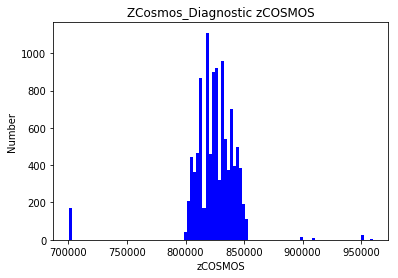

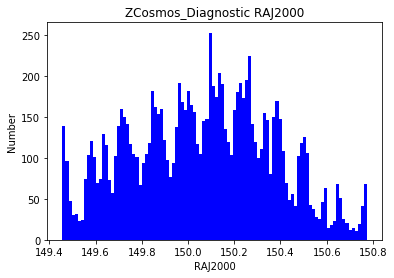

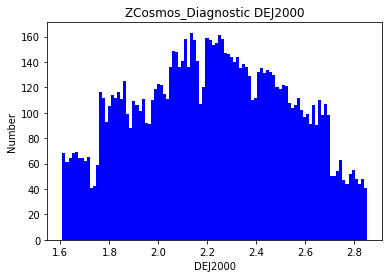

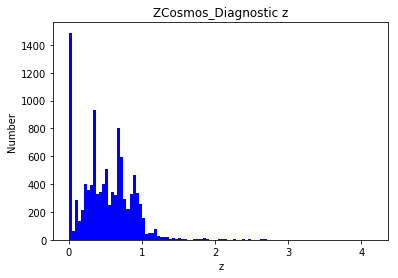

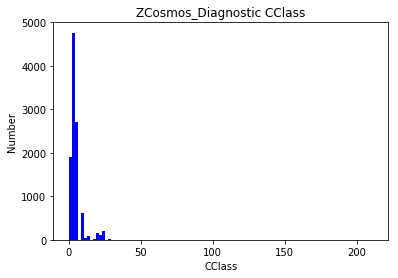

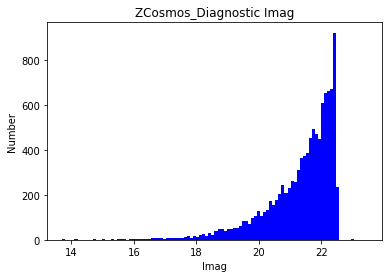

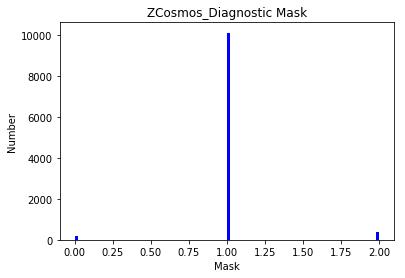

In [10]:
##diagnostic to find abnormal placeholder values for removal
for i in zcosmos:
    plt.hist(zcosmos[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos_Diagnostic" + " " + i)
    ##plt.savefig("ZCosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [11]:
##remove abnormal placeholder values
zcosmos = main_cleaner(zcosmos, gtr0)

In [12]:
cosmos_df = pd.DataFrame(fits_data2[1].data)
cosmos_df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34


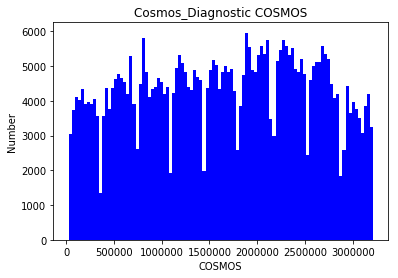

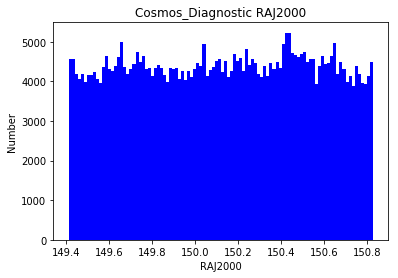

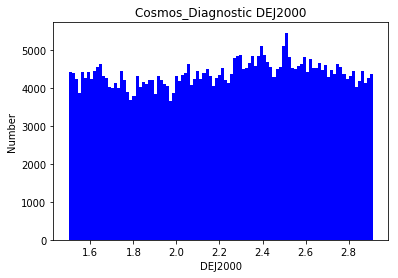

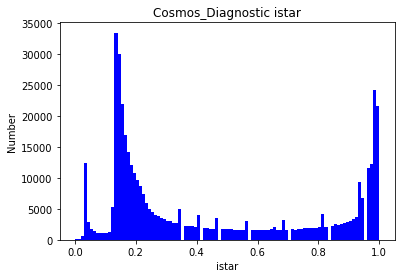

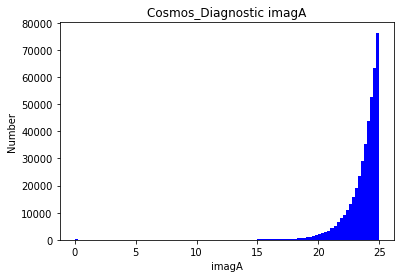

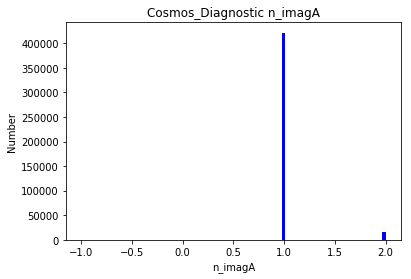

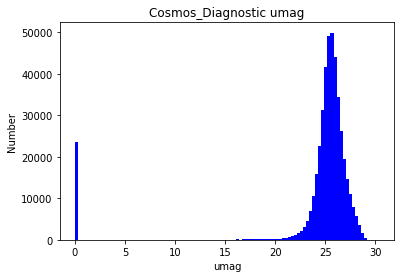

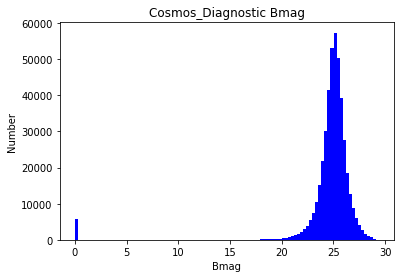

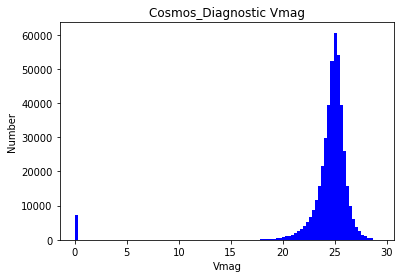

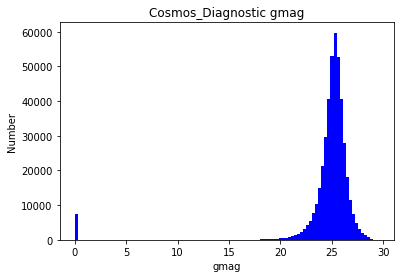

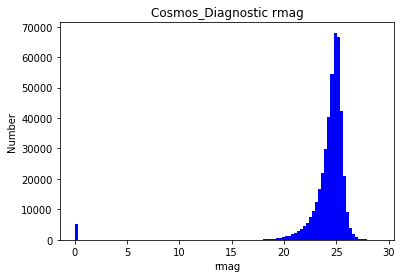

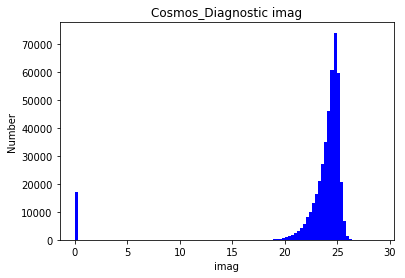

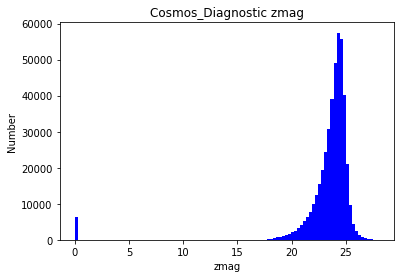

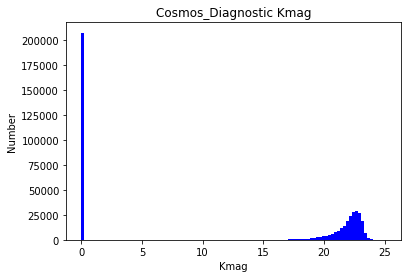

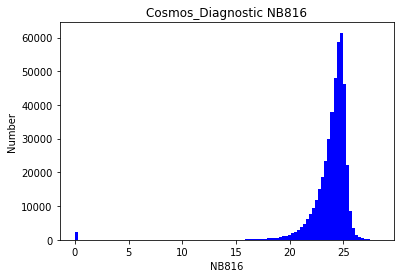

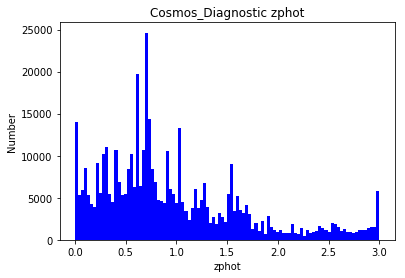

In [13]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_df:
    plt.hist(cosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_Diagnostic" + " " + i)
    ##plt.savefig("Cosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [14]:
cosmos = main_cleaner(cosmos_df, gtr0)

In [15]:
##cross match of cosmos and zcosmos from http://cdsxmatch.u-strasbg.fr/xmatch
cosmos_and_zcosmos_cross_match1= pd.read_csv('cross_match.csv')

In [16]:
cosmos_and_zcosmos_cross_match1.columns


Index(['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000',
       'istar', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag',
       'NB816', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
       'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask'],
      dtype='object')

In [17]:
cosmos_and_zcosmos_cross_match = main_cleaner(cosmos_and_zcosmos_cross_match1, gtr0)

In [18]:
cosmos_and_zcosmos_cross_match_useful_columns = ['angDist', '_RAJ2000', '_DEJ2000', 'COSMOS', 'RAJ2000', 'DEJ2000', 
                                                  'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag', 'zphot', '_RAJ2000.1', '_DEJ2000.1', 'zCOSMOS', 'RAJ2000.1',
                                                  'DEJ2000.1', 'z', 'CClass', 'Imag', 'Mask']

angDist


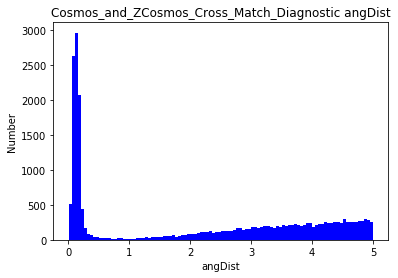

_RAJ2000


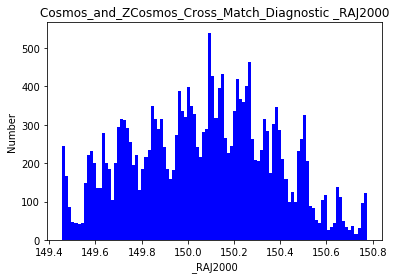

_DEJ2000


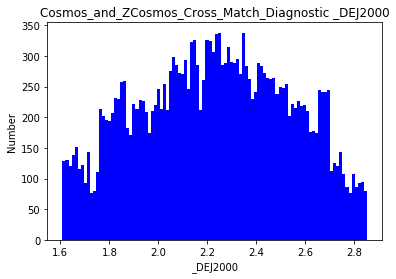

COSMOS


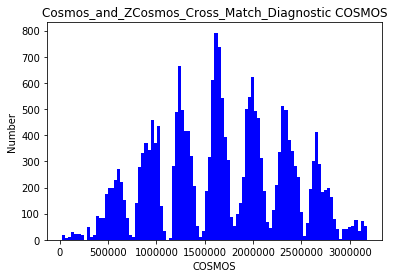

RAJ2000


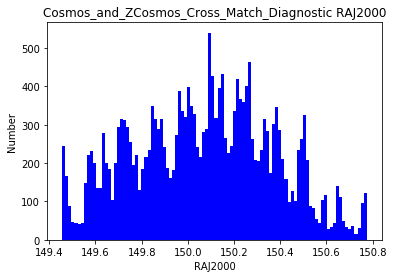

DEJ2000


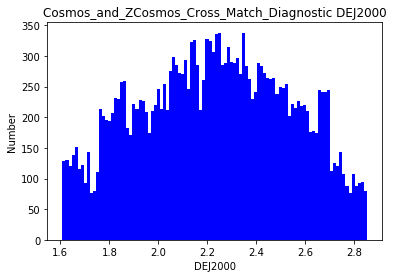

imagA


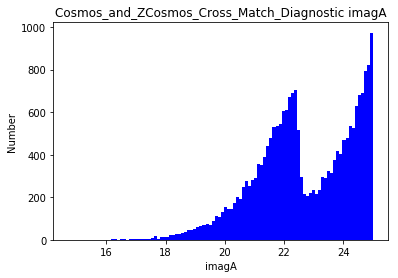

n_imagA


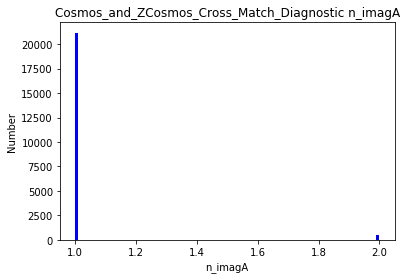

Bmag


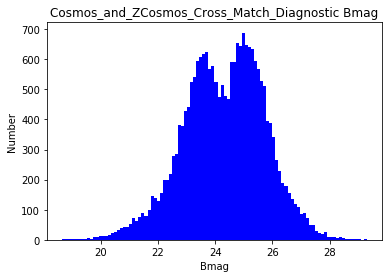

Vmag


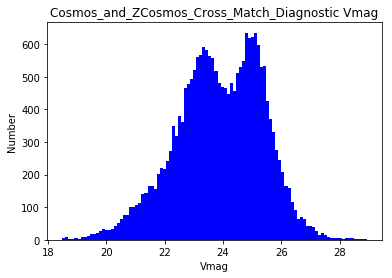

gmag


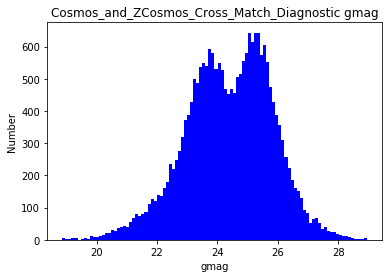

rmag


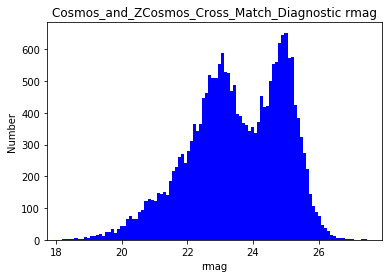

zmag


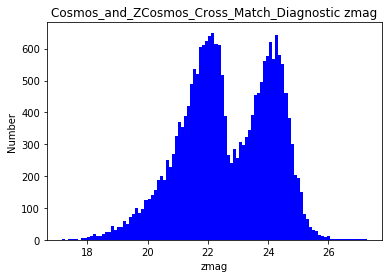

zphot


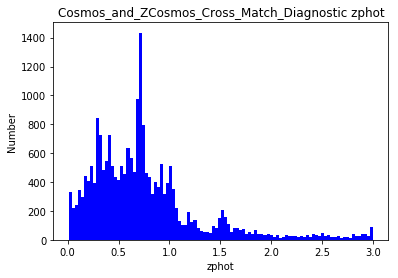

_RAJ2000.1


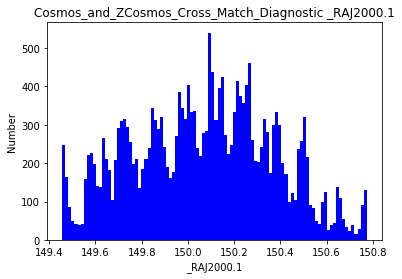

_DEJ2000.1


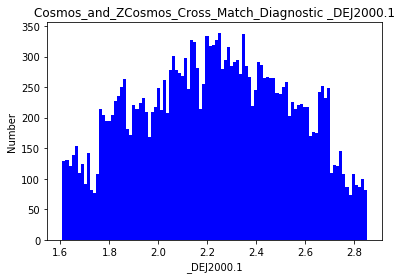

zCOSMOS


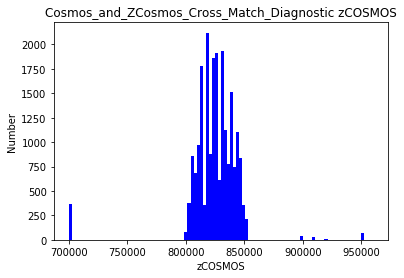

RAJ2000.1


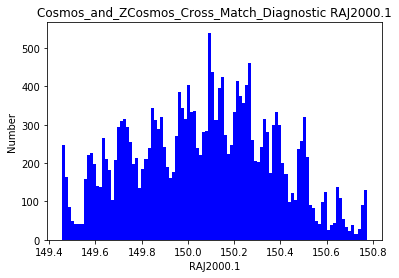

DEJ2000.1


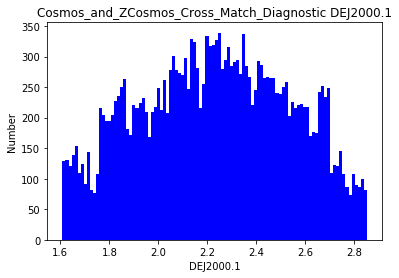

z


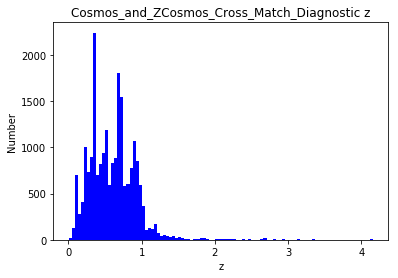

CClass


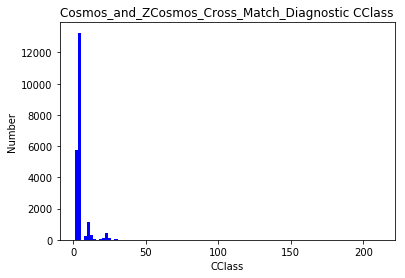

Imag


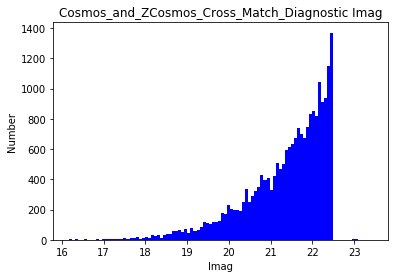

Mask


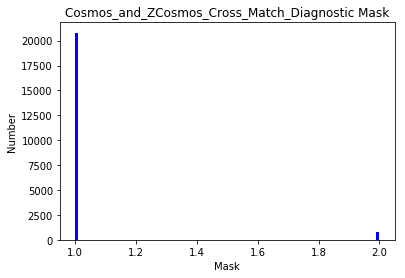

In [19]:
for i in cosmos_and_zcosmos_cross_match_useful_columns:
    print(i)
    plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i)
    ##plt.savefig("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [20]:
value_counts_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS'].value_counts(sort=False)
counts_zcosmos = value_counts_zcosmos.tolist()
value_counts_cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match['zCOSMOS'].value_counts(sort=False)
counts_cosmos_and_zcosmos_cross_match = value_counts_cosmos_and_zcosmos_cross_match.tolist()
ids_zcosmos = value_counts_zcosmos.keys().tolist()

value_counts_cosmos = cosmos_and_zcosmos_cross_match['COSMOS'].value_counts(sort=False)
counts_cosmos = value_counts_cosmos.tolist()
ids_cosmos = value_counts_cosmos.keys().tolist()

In [21]:
##find cosmos ids of cross match elements with zcosmos id used


match_indices_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS']
# print(match_indices_zcosmos)
zcosmos_unique = {}
# print(zcosmos_unique)
(zcosmos_unique['zcosmos_ids'], zcosmos_unique['xmatch_indices'], zcosmos_unique['counts']) = np.unique(match_indices_zcosmos, return_index=True, return_counts=True)
# unique_xmatch_indices = zcosmos_unique['xmatch_indices']
# zcosmos_id1 = zcosmos_unique['zcosmos_ids']
for i in zcosmos_unique['counts']:
    
    
    
#     zcosmos_id2 = cosmos_and_zcosmos_cross_match[i][zcosmos_id1]
#     print(zcosmos_unique['zcosmos_ids'])
    #     cosmos_ids = 

    if zcosmos_unique['zcosmos_ids'][i] > 1:
        print('YAY')
#         cosmos_ids_set = (cosmos_and_zcosmos_cross_match['COSMOS'][i])
###    ids_cosmos = zcosmos_unique['xmatch_indices'][cosmos_and_zcosmos_cross_match['COSMOS'] == zcosmos_unique['zcosmos_ids'][i]].index.tolist()

YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY


YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY


YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY
YAY


In [22]:
match_indices_zcosmos = cosmos_and_zcosmos_cross_match['zCOSMOS']
# print(match_indices_zcosmos)
zcosmos_unique = {}
# print(zcosmos_unique)
(zcosmos_unique['zcosmos_ids'], zcosmos_unique['xmatch_indices'], zcosmos_unique['counts']) = np.unique(match_indices_zcosmos, return_index=True, return_counts=True)
# unique_xmatch_indices = zcosmos_unique['xmatch_indices']
# zcosmos_id1 = zcosmos_unique['zcosmos_ids']
#     print(zcosmos_unique['counts'])

# duplicated_indices = zcosmos_unique['xmatch_indices'][zcosmos_unique['counts'] > 1]
# for i in duplicated_indices:
#     print(i)
#     zcosmos_id = (cosmos_and_zcosmos_cross_match['zCOSMOS'][i])
#     print(zcosmos_id, np.where(zcosmos_unique['zcosmos_ids'] == zcosmos_id))
# #     print(cosmos_and_zcosmos_cross_match[COSMOS'][zcosmos_id])

In [23]:
##here is the document I actually need
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match[cosmos_and_zcosmos_cross_match_useful_columns]

In [24]:
cosmos_only = cosmos[~cosmos['COSMOS'].isin(cosmos_and_zcosmos_cross_match['COSMOS'])]
zcosmos_only = zcosmos[~zcosmos['zCOSMOS'].isin(cosmos_and_zcosmos_cross_match['zCOSMOS'])]

In [25]:
cosmos = pd.DataFrame(data=cosmos)

In [26]:
transmission_rate = [.7, .93, .94, .95, .96]
np.savetxt('transmission_rate.txt', transmission_rate)

In [27]:
new_transmission_rate = np.genfromtxt("transmission_rate.txt")

In [28]:
print(new_transmission_rate)

[ 0.7   0.93  0.94  0.95  0.96]


In [29]:
Galaxies_and_Redshifts = {'Galaxy': ['Red', 'Blue'], 'Redshift': [0, 0.5, 1.5]}
Galaxies_and_Redshifts_List = list(itertools.product(Galaxies_and_Redshifts['Galaxy'], Galaxies_and_Redshifts['Redshift']))
Galaxies_and_Redshifts_List_df = pd.DataFrame(data = Galaxies_and_Redshifts_List, columns = Galaxies_and_Redshifts.keys())

In [30]:
Galaxies_and_Redshifts_List_df['Z'] = pd.Series([.75, .75, .65, .4, .55, .8], index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['InfraRed'] = pd.Series([.75, .65, .075, .4, .6, .5], index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['Red'] = pd.Series([.6, .1, .01, .45, .7, .45], index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['Green'] = pd.Series([.55, .1, .0, .6, .4, .5], index=Galaxies_and_Redshifts_List_df.index)
Galaxies_and_Redshifts_List_df['UltraViolet'] = pd.Series([.15, .0, .0, .45, .5, .7], index=Galaxies_and_Redshifts_List_df.index)

In [31]:
Galaxies_and_Redshifts_List_df.to_csv('Galaxies_and_Redshifts_List_df.csv', columns = Galaxies_and_Redshifts_List_df.columns, index = False)

In [32]:
Galaxies_and_Redshifts_List_df = pd.read_csv('Galaxies_and_Redshifts_List_df.csv')

In [33]:
Umag_list = []
for i in Galaxies_and_Redshifts_List_df['UltraViolet']:
    i = .7 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Umag_list.append(i)
Galaxies_and_Redshifts_List_df['Umag'] = pd.Series(Umag_list, index=Galaxies_and_Redshifts_List_df.index)

6.189350872508193
0
0
4.996547735709036
4.8821540093073486
4.516833920111754


In [34]:
Gmag_list = []
for i in Galaxies_and_Redshifts_List_df['Green']:
    i = .93 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Gmag_list.append(i)
Galaxies_and_Redshifts_List_df['Gmag'] = pd.Series(Gmag_list, index=Galaxies_and_Redshifts_List_df.index)

4.47021002506259
6.3211167487981985
0
4.375738622839091
4.815966770478293
4.5736917379581525


In [35]:
Rmag_list = []
for i in Galaxies_and_Redshifts_List_df['Red']:
    i = .94 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Rmag_list.append(i)
Galaxies_and_Redshifts_List_df['Rmag'] = pd.Series(Rmag_list, index=Galaxies_and_Redshifts_List_df.index)##I don't know why the only thing in the list is the last value of i

4.364126360224682
6.309504486183791
8.80950448618379
4.676473201745432
4.196759386148149
4.676473201745432


In [36]:
Imag_list = []
for i in Galaxies_and_Redshifts_List_df['InfraRed']:
    i = .95 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Imag_list.append(i)
Galaxies_and_Redshifts_List_df['Imag'] = pd.Series(Imag_list, index=Galaxies_and_Redshifts_List_df.index)

4.110361948481668
4.265731715353779
6.610361948481668
4.7928651286410116
4.352636981001809
4.550590096120871


In [37]:
Zmag_list = []
for i in Galaxies_and_Redshifts_List_df['Z']:
    i = .96 * i
    i = i / 31.4
    if i == 0:
        i = 0
        print(i)
    else:
        i = math.log10(i)
        i = i * -2.5
        print(i)
    Zmag_list.append(i)
Galaxies_and_Redshifts_List_df['Zmag'] = pd.Series(Zmag_list, index=Galaxies_and_Redshifts_List_df.index)

4.098992879104866
4.098992879104866
4.254362645976977
4.78149605926421
4.435739313848507
4.028921070104257


plot those on top of plots for other data sets

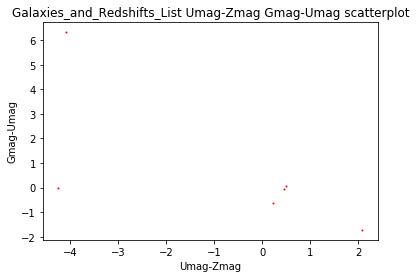

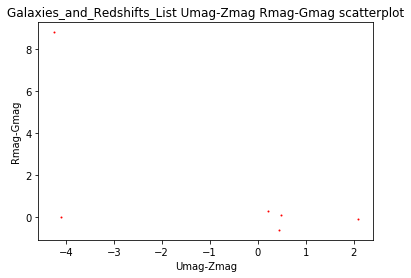

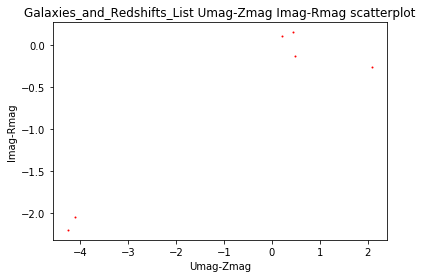

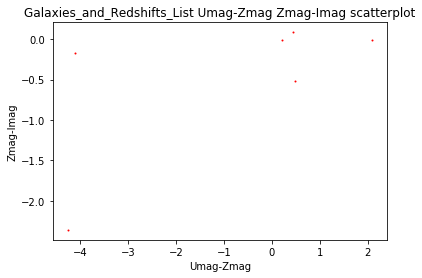

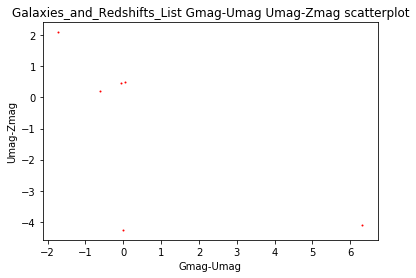

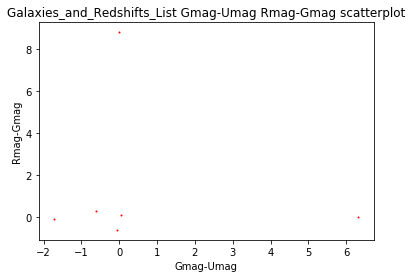

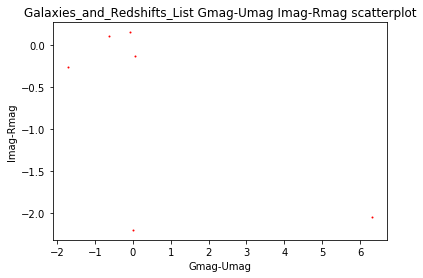

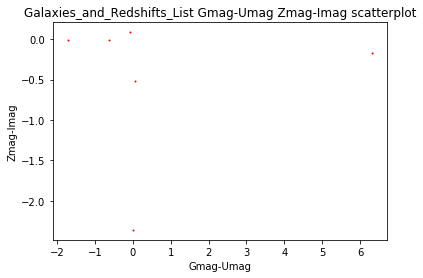

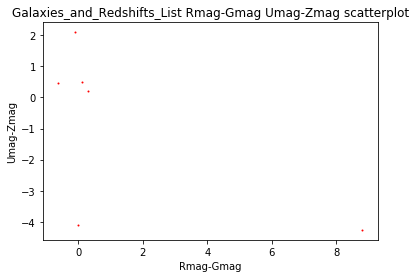

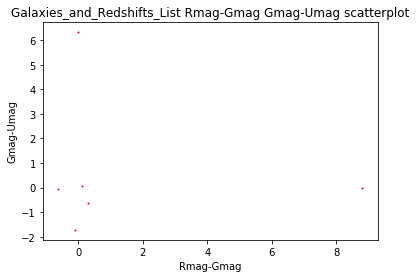

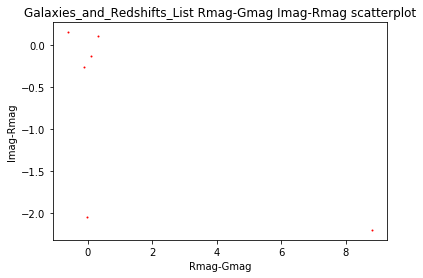

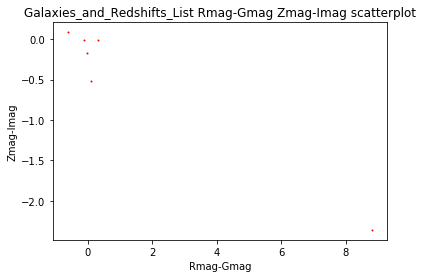

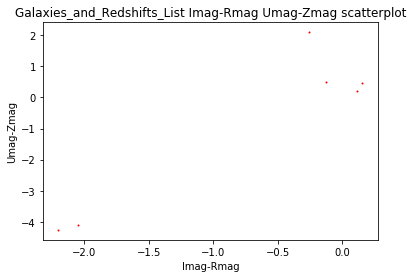

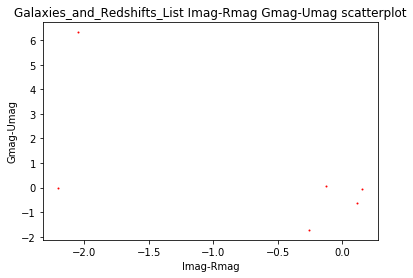

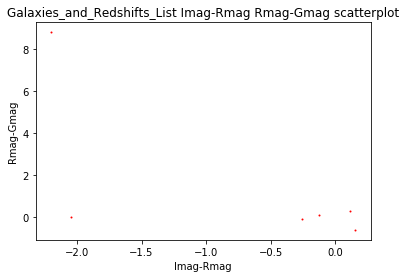

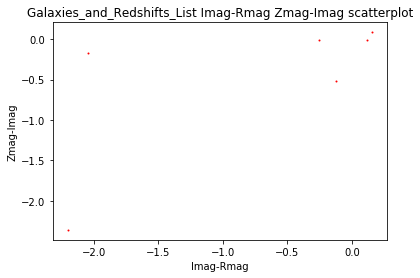

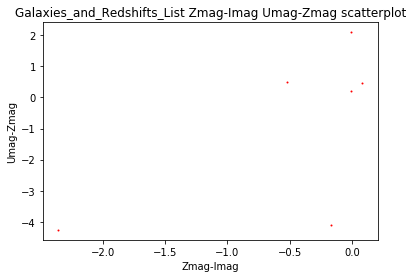

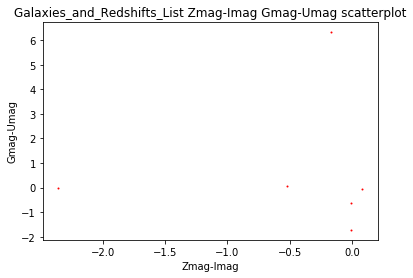

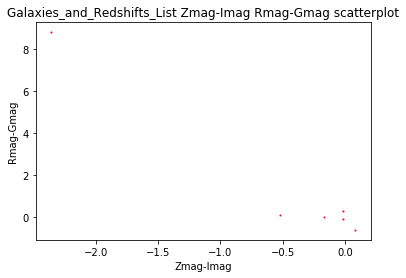

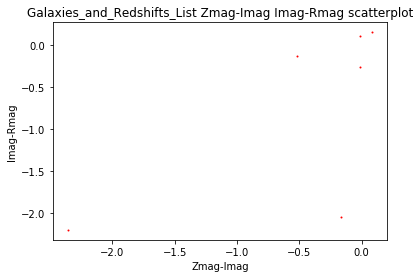

In [38]:
field_names = ['Umag', 'Gmag', 'Rmag', 'Imag', 'Zmag']
(out_df, out_strings) = younger_student(Galaxies_and_Redshifts_List_df, field_names)
(color_permutations) = even_younger_student(out_df, field_names, out_strings)
me_now('Galaxies_and_Redshifts_List', Galaxies_and_Redshifts_List_df, field_names, out_strings, 'scatter', 1)

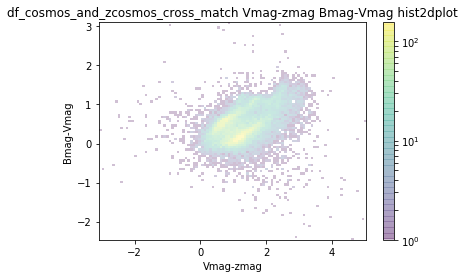

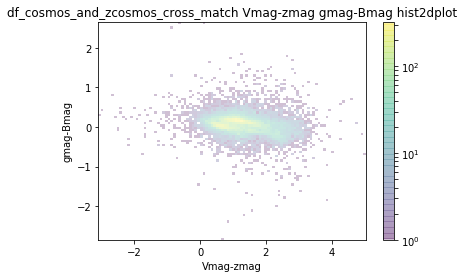

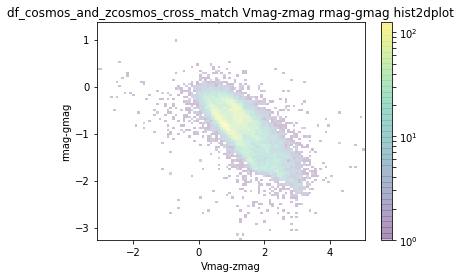

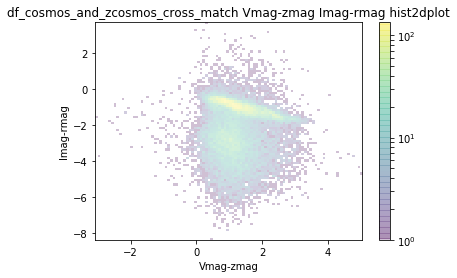

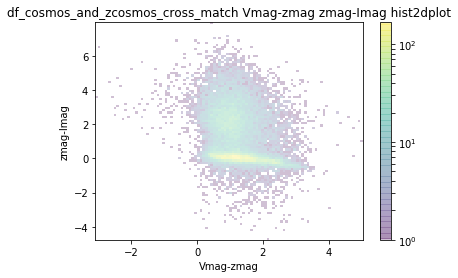

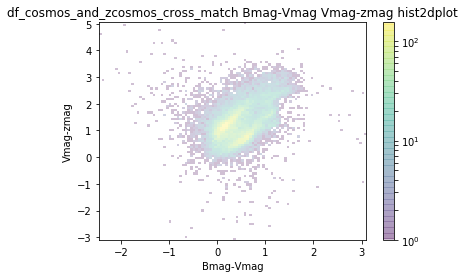

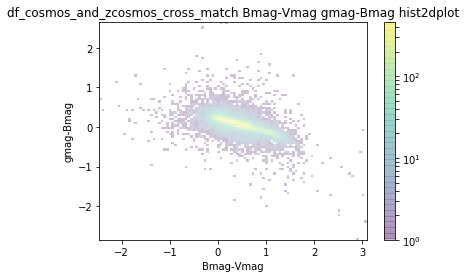

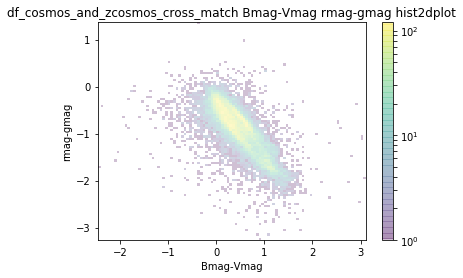

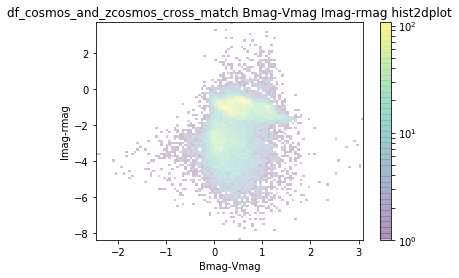

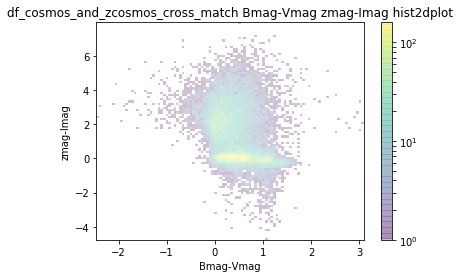

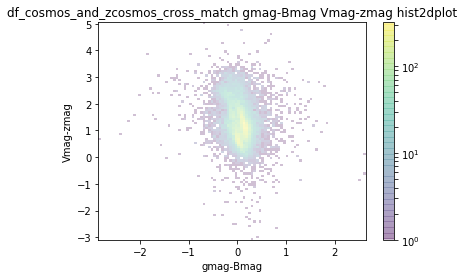

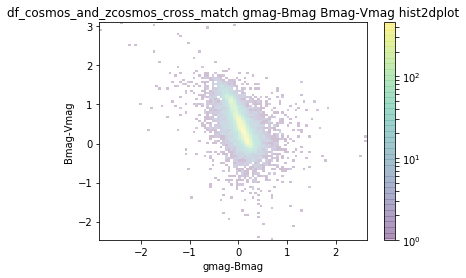

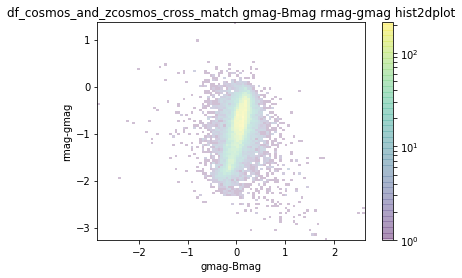

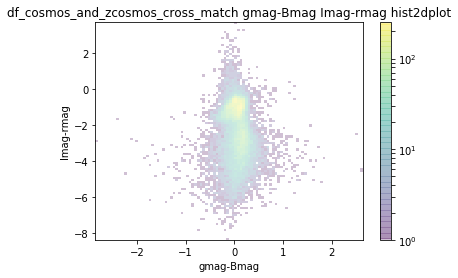

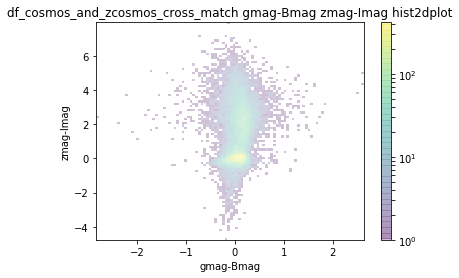

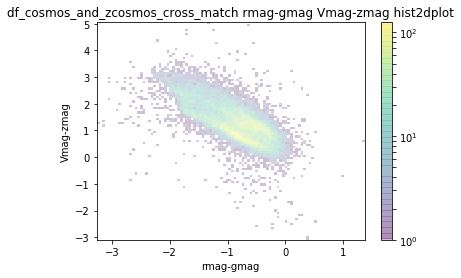

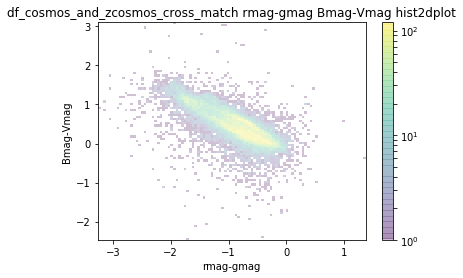

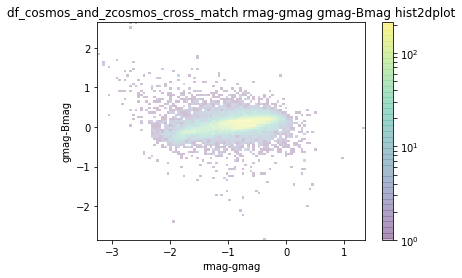

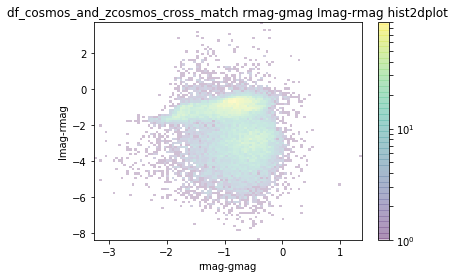

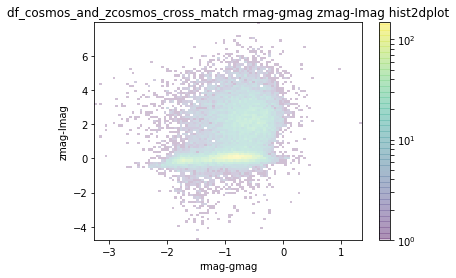

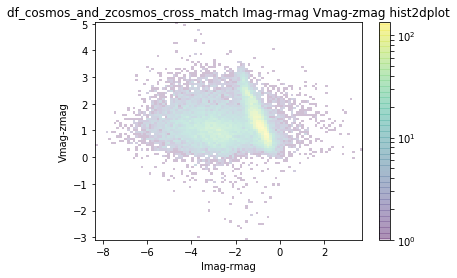

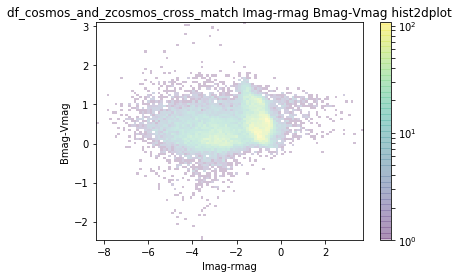

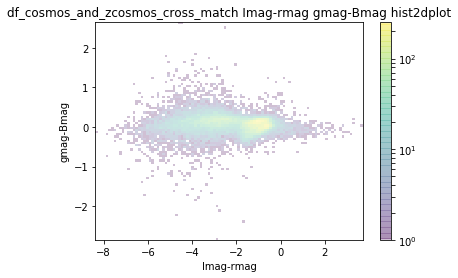

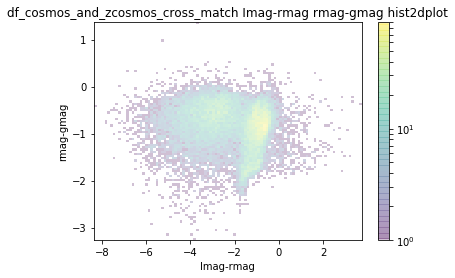

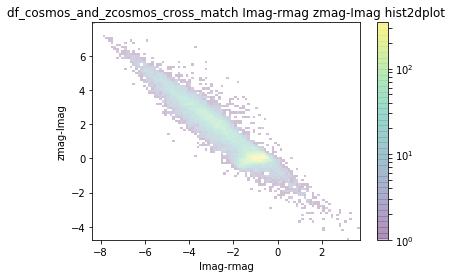

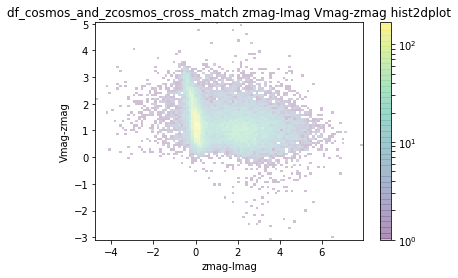

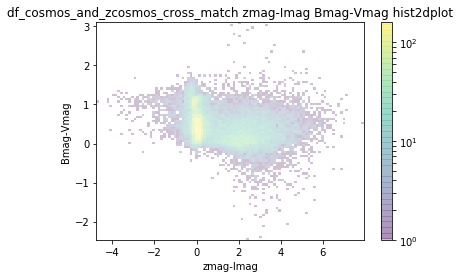

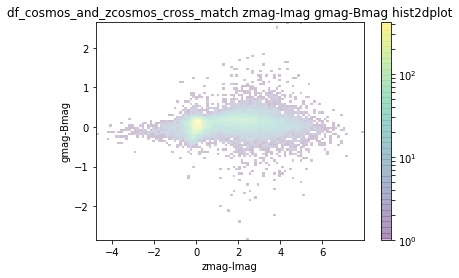

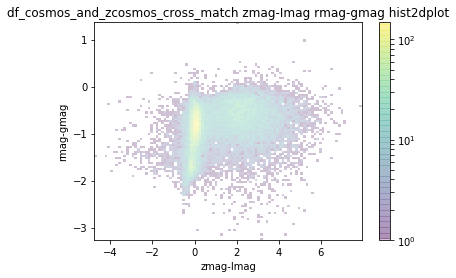

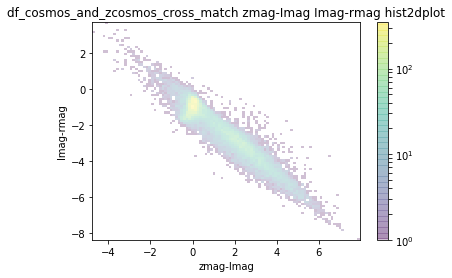

In [39]:
field_names = ['Vmag', 'Bmag', 'gmag', 'rmag', 'Imag', 'zmag']
(out_df, out_strings) = younger_student(cosmos_and_zcosmos_cross_match, field_names)
(color_permutations) = even_younger_student(out_df, field_names, out_strings)
# me_now(out_df, field_names, out_strings, 'scatter', .25)
me_now('df_cosmos_and_zcosmos_cross_match', cosmos_and_zcosmos_cross_match, field_names, out_strings, 'hist2d', .25)

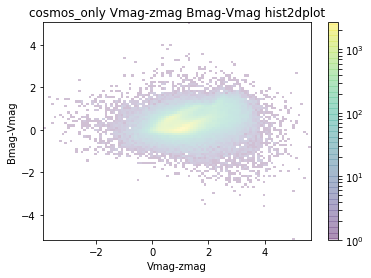

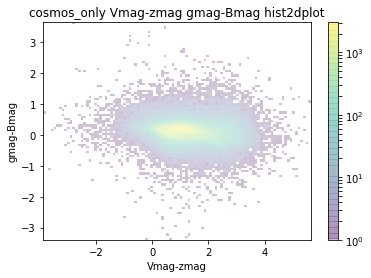

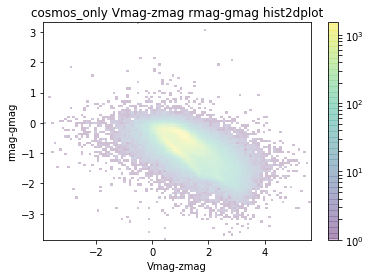

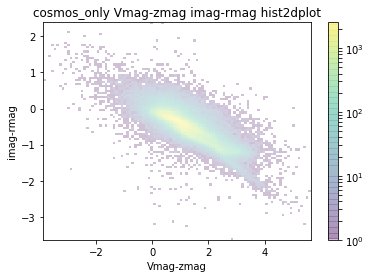

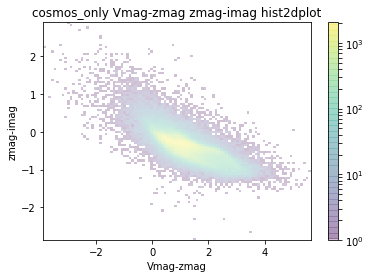

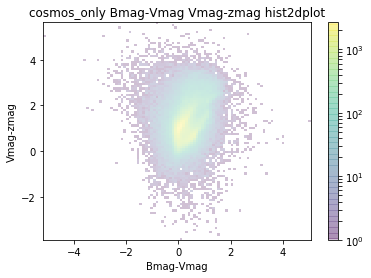

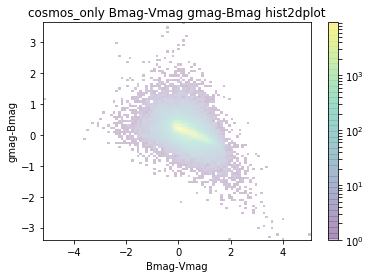

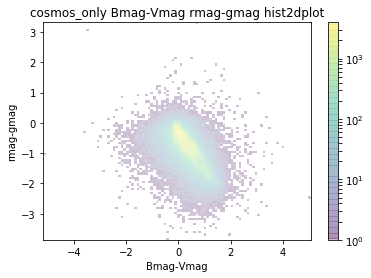

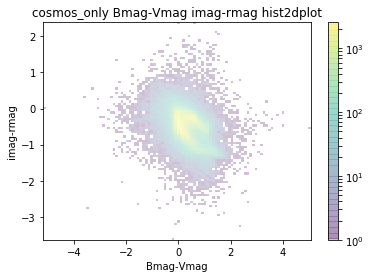

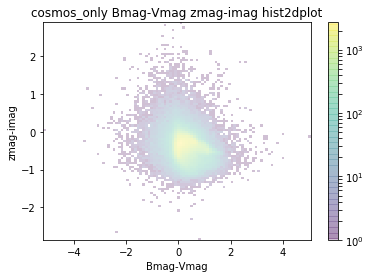

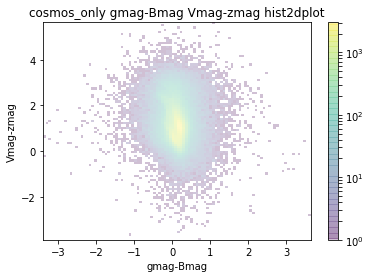

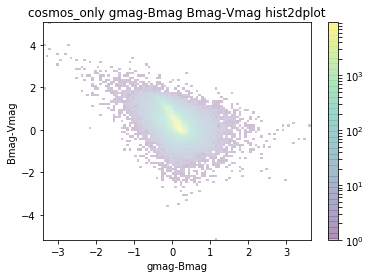

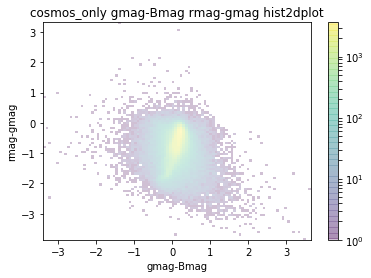

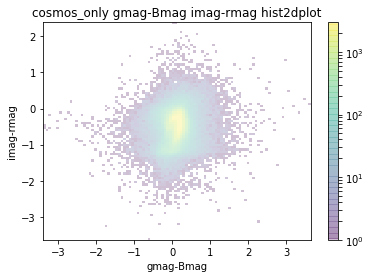

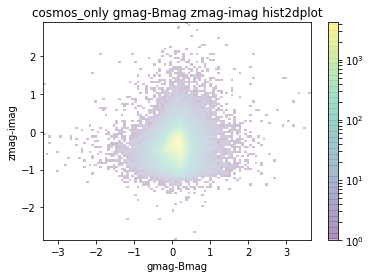

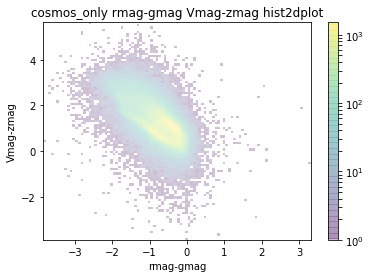

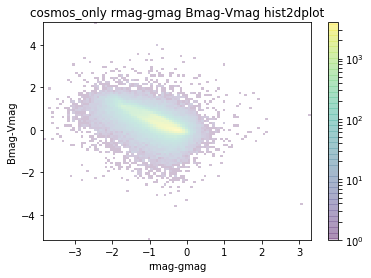

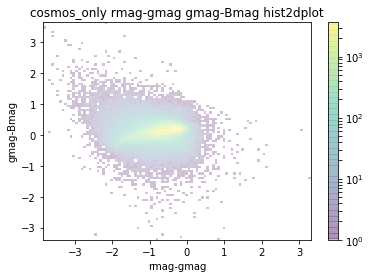

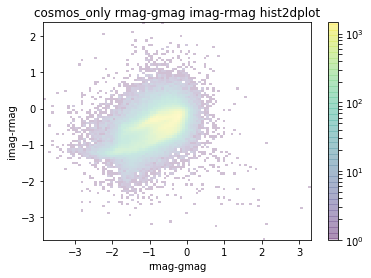

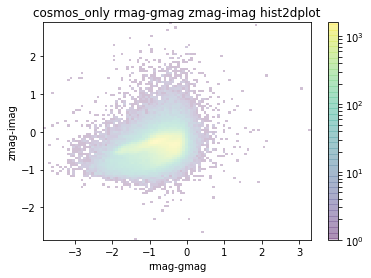

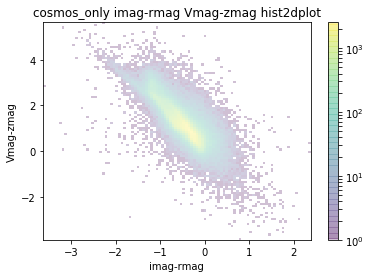

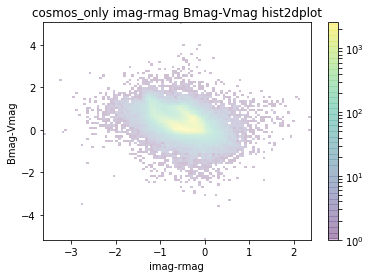

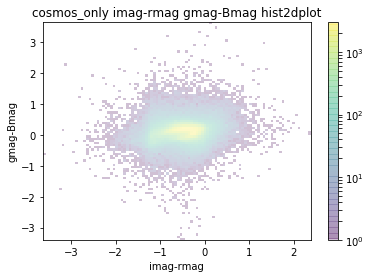

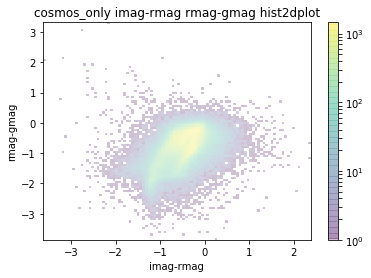

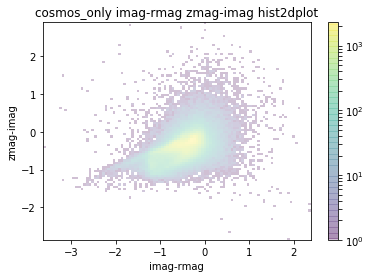

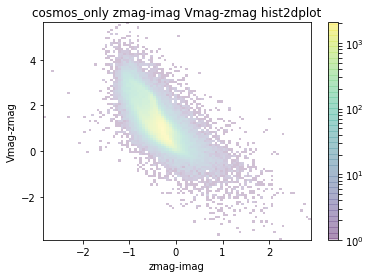

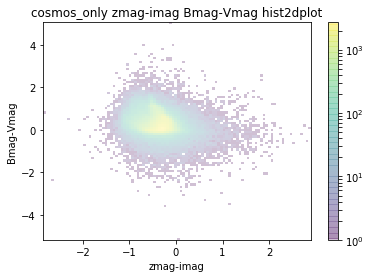

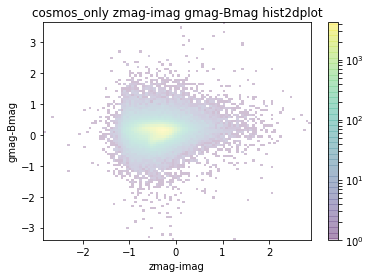

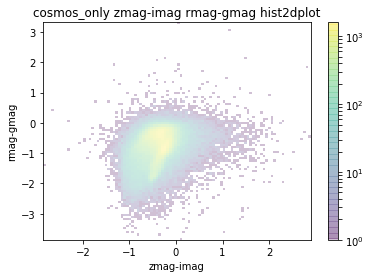

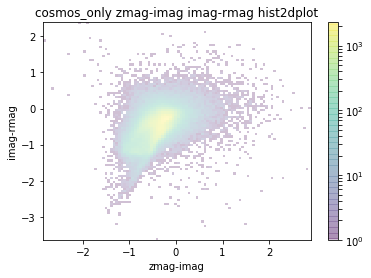

In [40]:
field_names = ['Vmag', 'Bmag', 'gmag', 'rmag', 'imag', 'zmag']
(out_df, out_strings) = younger_student(cosmos_only, field_names)
(color_permutations) = even_younger_student(out_df, field_names, out_strings)
# me_now(out_df_cosmos_only, field_names_cosmos_only, out_strings_cosmos_only, 'scatter', .25)
me_now('cosmos_only', out_df, field_names, out_strings, 'hist2d', .25)

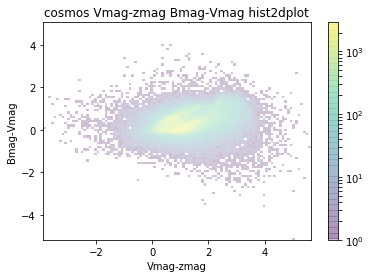

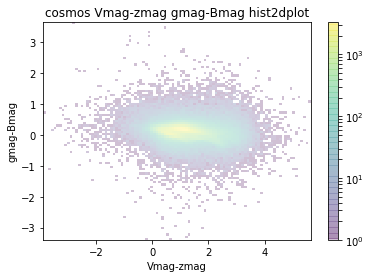

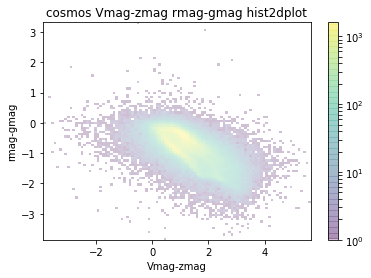

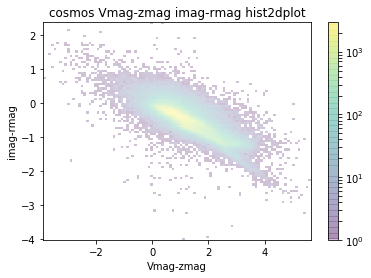

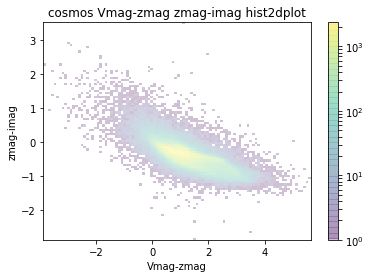

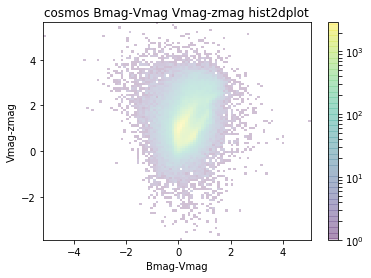

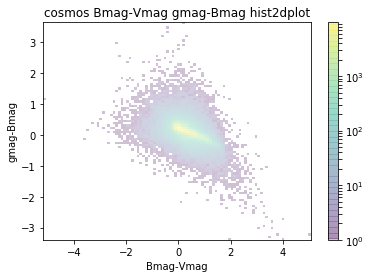

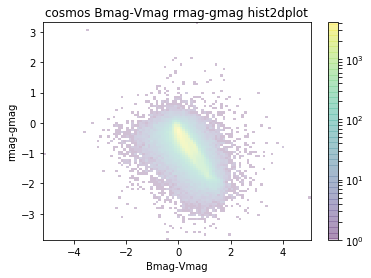

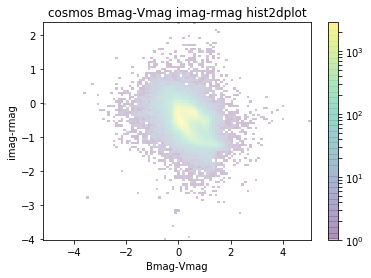

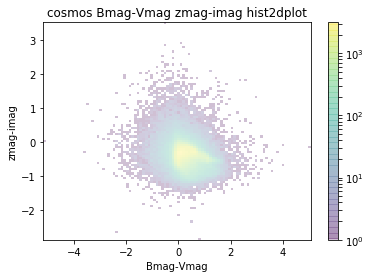

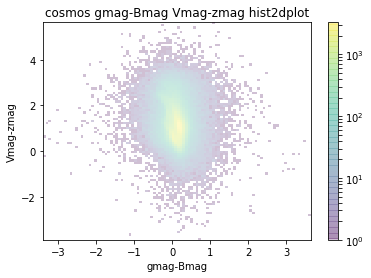

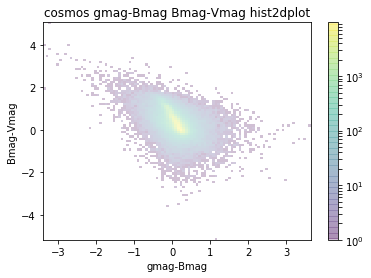

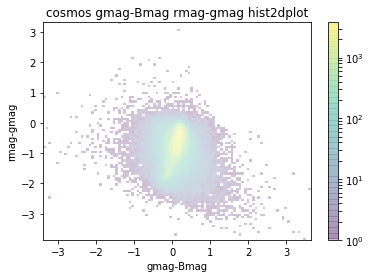

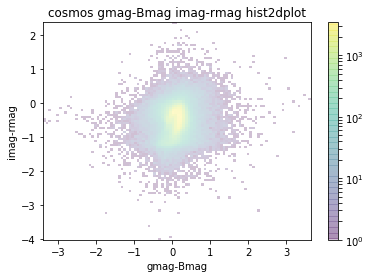

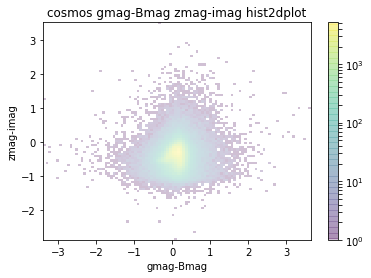

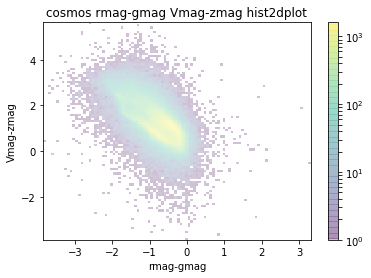

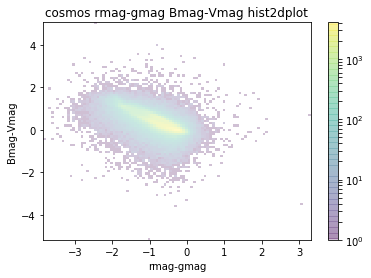

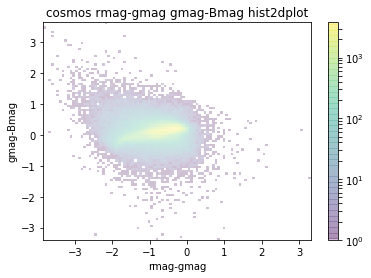

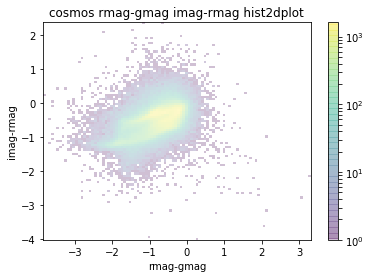

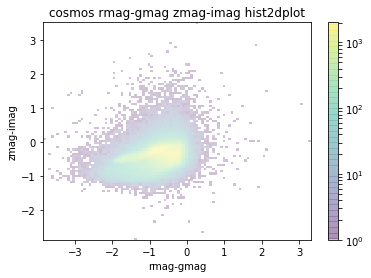

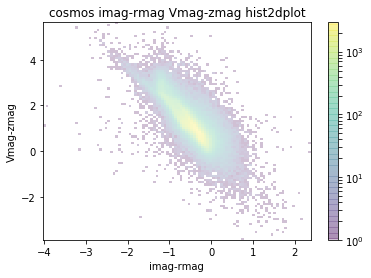

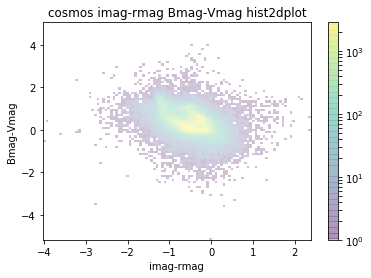

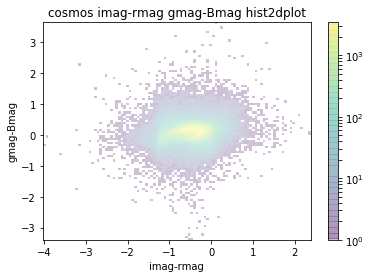

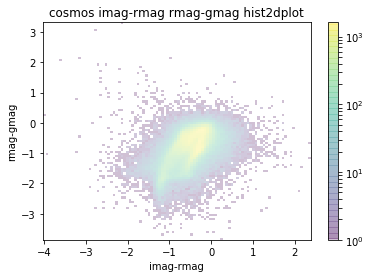

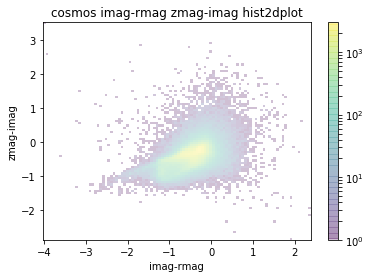

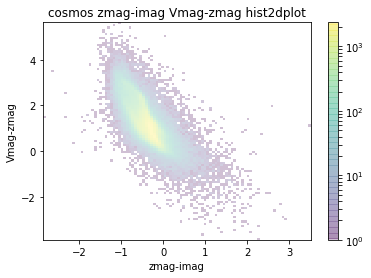

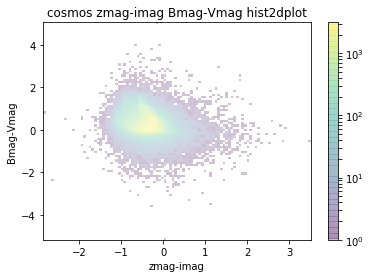

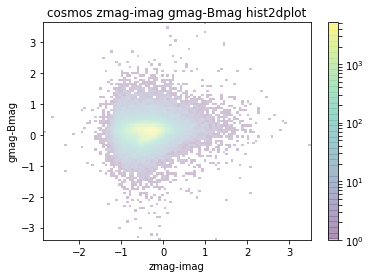

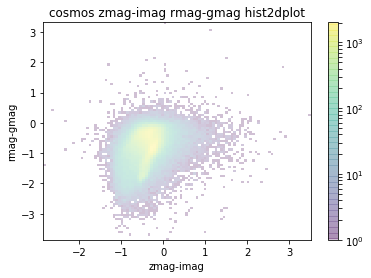

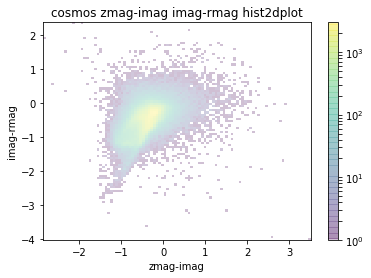

In [41]:
field_names = ['Vmag', 'Bmag', 'gmag', 'rmag', 'imag', 'zmag']
(out_df, out_strings) = younger_student(cosmos, field_names)
(color_permutations) = even_younger_student(out_df, field_names, out_strings)
# me_now(out_df_cosmos, field_names_cosmos, out_strings_cosmos, 'scatter', .25)
me_now('cosmos', out_df, field_names, out_strings, 'hist2d', .25)

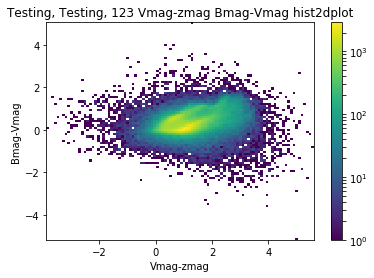

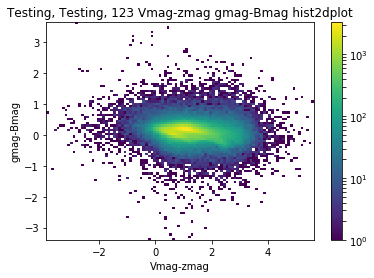

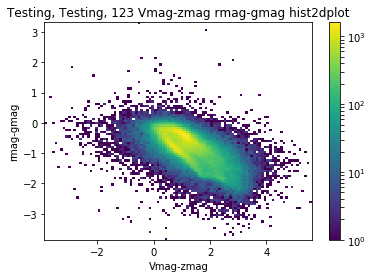

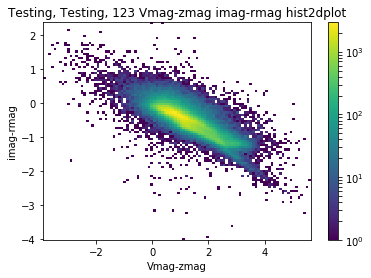

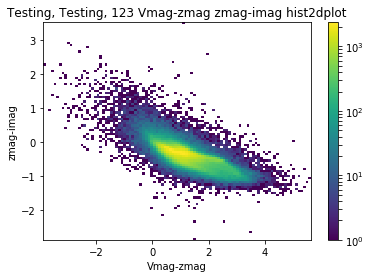

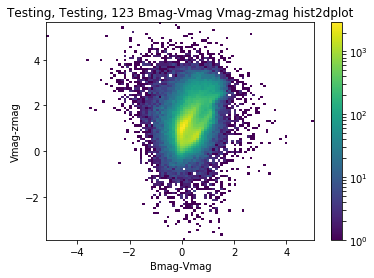

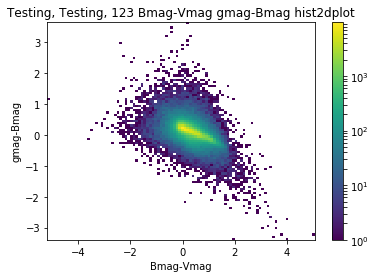

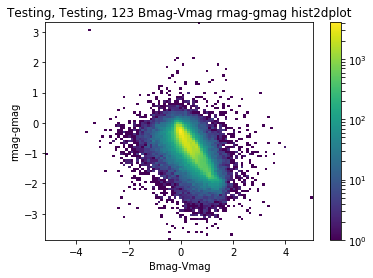

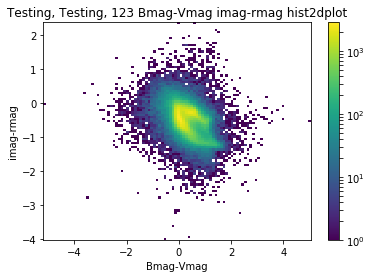

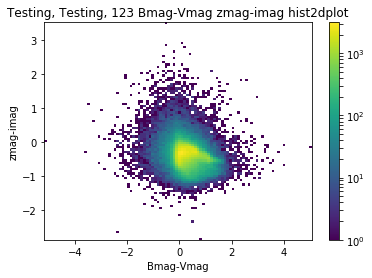

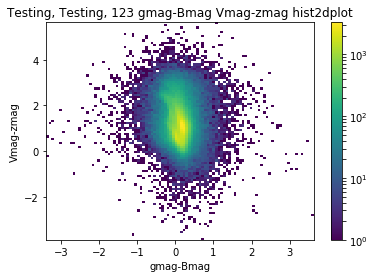

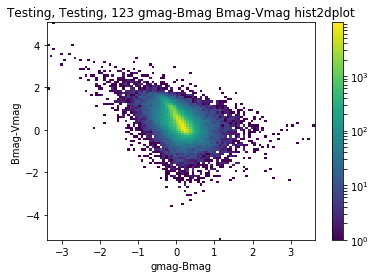

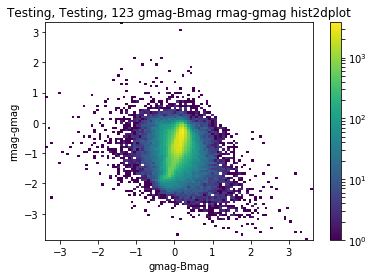

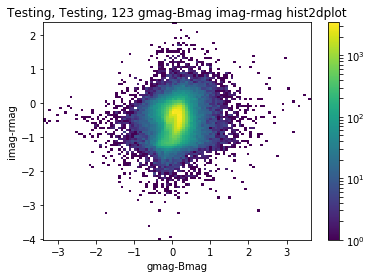

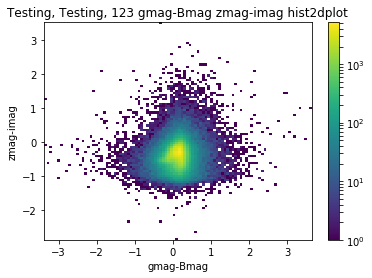

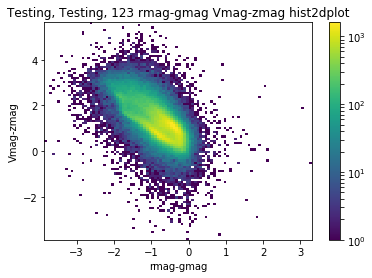

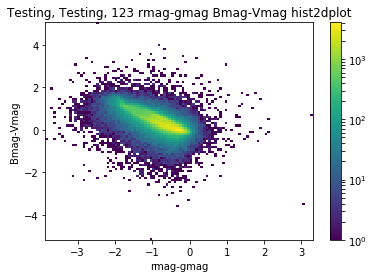

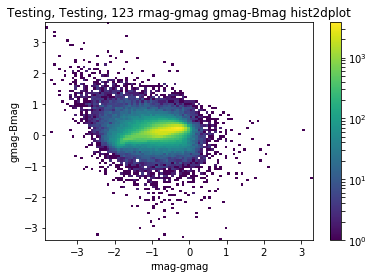

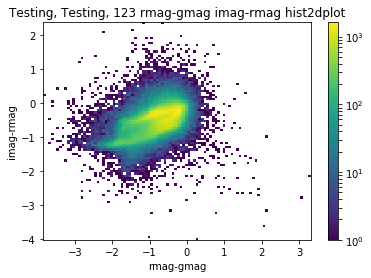

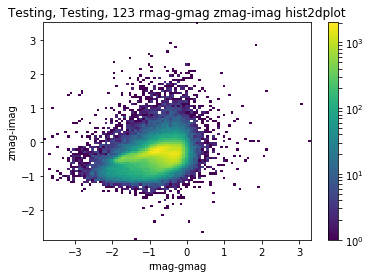

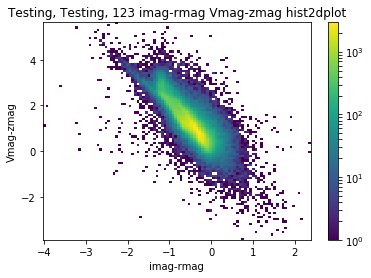

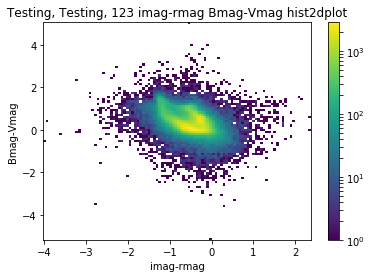

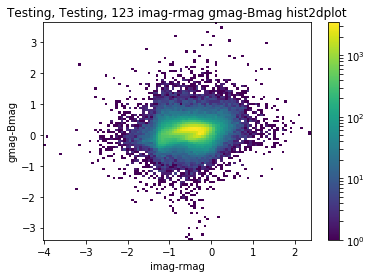

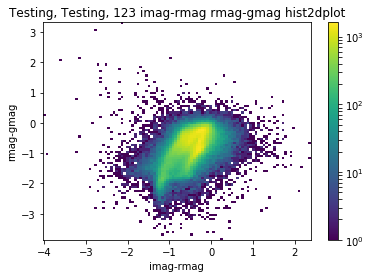

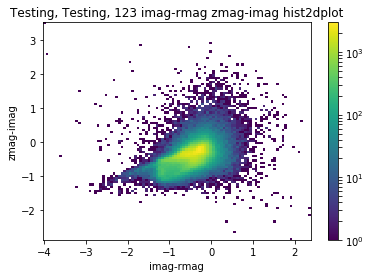

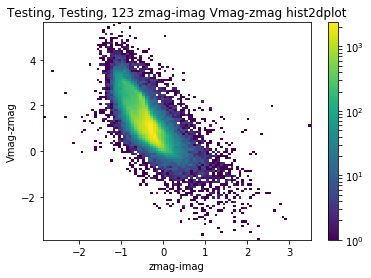

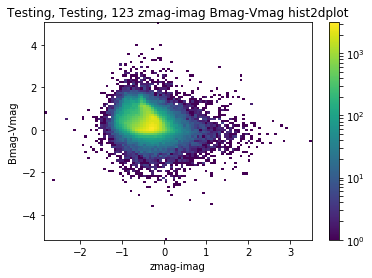

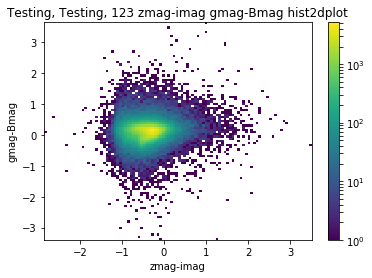

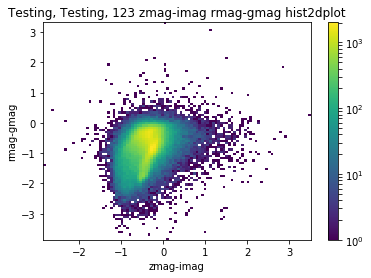

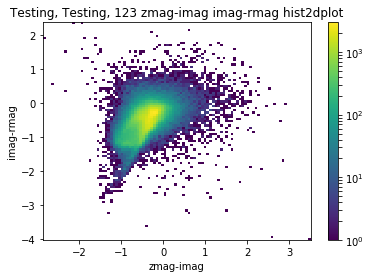

KeyError: 'Vmag-zmag'

In [43]:
field_names_cosmos = ['Vmag', 'Bmag', 'gmag', 'rmag', 'imag', 'zmag']
field_names_Galaxies_and_Redshifts_List_df = ['Umag', 'Gmag', 'Rmag', 'Imag', 'Zmag']
me_again('Testing, Testing, 123', cosmos, Galaxies_and_Redshifts_List_df, field_names_cosmos, field_names_Galaxies_and_Redshifts_List_df, out_strings, 1)

In [ ]:
field_names_cosmos_only = ['Vmag', 'Bmag', 'gmag', 'rmag', 'imag', 'zmag']
field_names_Galaxies_and_Redshifts_List_df = ['Umag', 'Gmag', 'Rmag', 'Imag', 'Zmag']
me_again('Testing, Testing, 1234', cosmos_only, Galaxies_and_Redshifts_List_df, field_names_cosmos_only, field_names_Galaxies_and_Redshifts_List_df, out_strings, 1)

In [ ]:
field_names_cosmos_and_zcosmos_cross_match = ['Vmag', 'Bmag', 'gmag', 'rmag', 'Imag', 'zmag']
field_names_Galaxies_and_Redshifts_List_df = ['Umag', 'Gmag', 'Rmag', 'Imag', 'Zmag']
me_again('Testing, Testing, 1235', cosmos_and_zcosmos_cross_match, Galaxies_and_Redshifts_List_df, field_names_cosmos_and_zcosmos_cross_match, field_names_Galaxies_and_Redshifts_List_df, out_strings, 1)